In [4]:
from ounoise import OUNoise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

size = 1
mu = 0.0
exploration_theta = 1.0
exploration_sigma = 0.2
# thetas = np.arange(0.0, 1.2, 0.2)
thetas = [0.0, 0.01, 0.15, 0.4, 0.6, 1.0]

num_iter = 10000
results = np.zeros([len(thetas), num_iter])

for i_theta, exploration_theta in enumerate(thetas):
    np.random.seed(0)
    noise = OUNoise(size, mu, exploration_theta, exploration_sigma)

    for i_iter in range(num_iter):
        results[i_theta][i_iter] = (noise.sample())

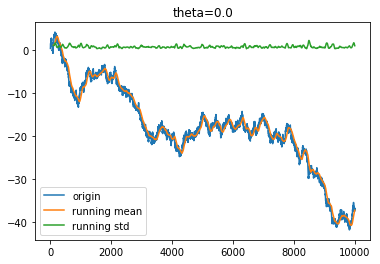

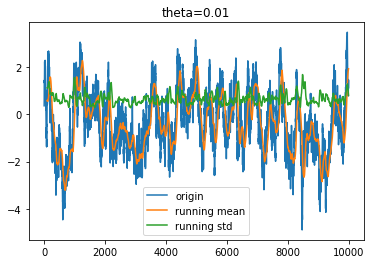

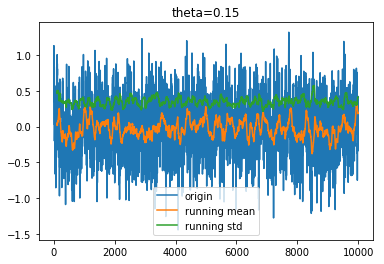

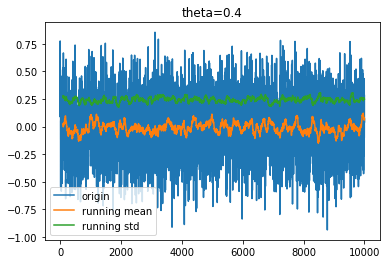

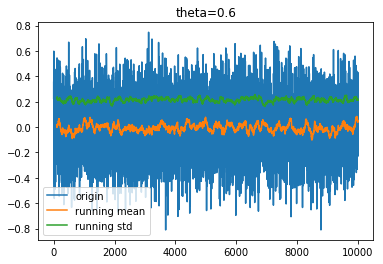

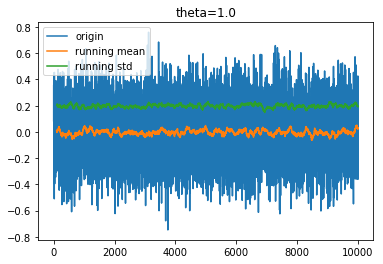

In [5]:
x_axis = np.arange(num_iter)

for i_theta, exploration_theta in enumerate(thetas):
    r = results[i_theta]
    
    df = pd.DataFrame(r)
    
    window = 100
    df_rolling = df.rolling(window).mean() 
    df_rolling_std = df.rolling(window).std()
    
    df_concate = pd.concat([df, df_rolling, df_rolling_std], axis=1)
    df_concate.columns = ['origin', 'running mean', 'running std']
    df_concate.plot(title='theta={}'.format(exploration_theta))
    